Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import sklearn as sns
import warnings

Loading file

In [13]:
data = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin1')

In [14]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
data.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [23]:
data.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [24]:
duplicated = data.duplicated().sum()
print(duplicated)

0


In [25]:
missing_values = data.isnull().sum()
total_missing_values = (missing_values).sum()
total_cells = np.product(data.shape)
percent_missing = (total_missing_values/total_cells) * 100
print("Percent of data that is missing :", percent_missing)
print(missing_values)

Percent of data that is missing : 0.006235827664399093
Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


Sales Analysis

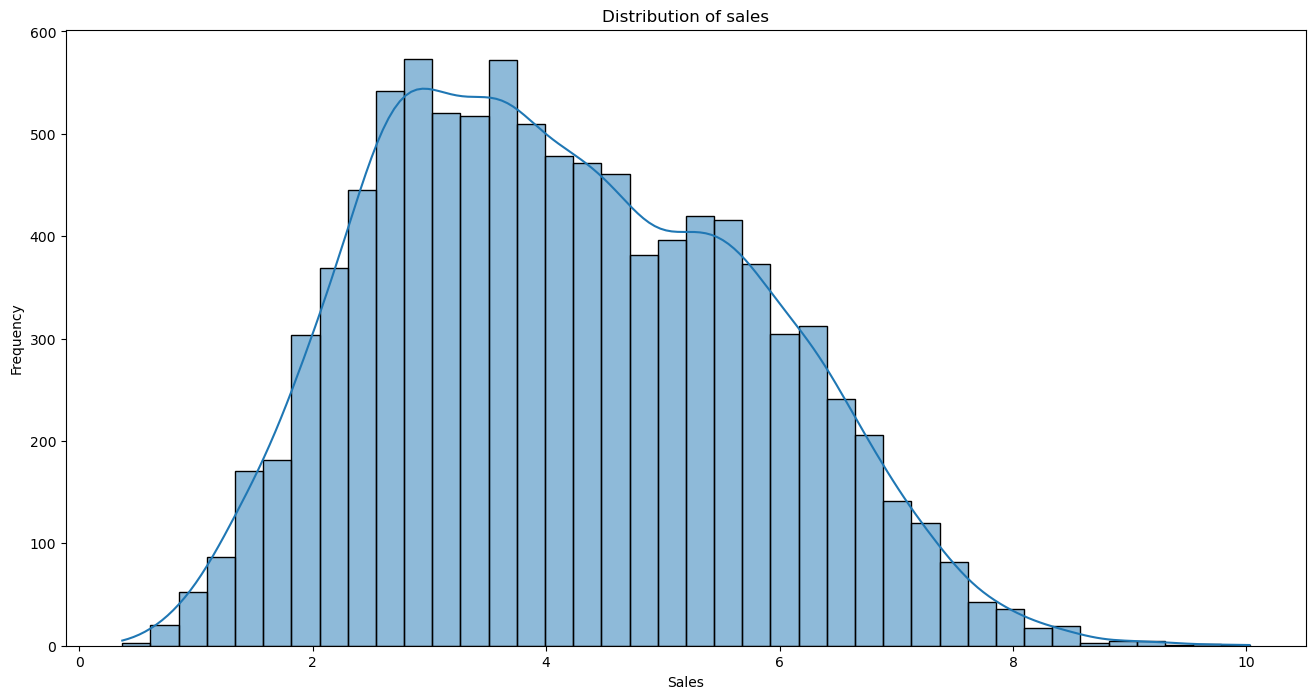

In [28]:
plt.figure(figsize=(16,8))
sns.histplot(data=np.log1p(data['Sales']), bins=40, kde=True)
plt.title("Distribution of sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [29]:
df =data

In [48]:
df['Sales'] = df['Sales'].astype(int)

df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['weekday_order_date'] = df['Order_Date'].dt.weekday

df['year_ship_date'] = df['Ship_Date'].dt.year
df['month_ship_date'] = df['Ship_Date'].dt.month
df['weekday_ship_date'] = df['Ship_Date'].dt.weekday

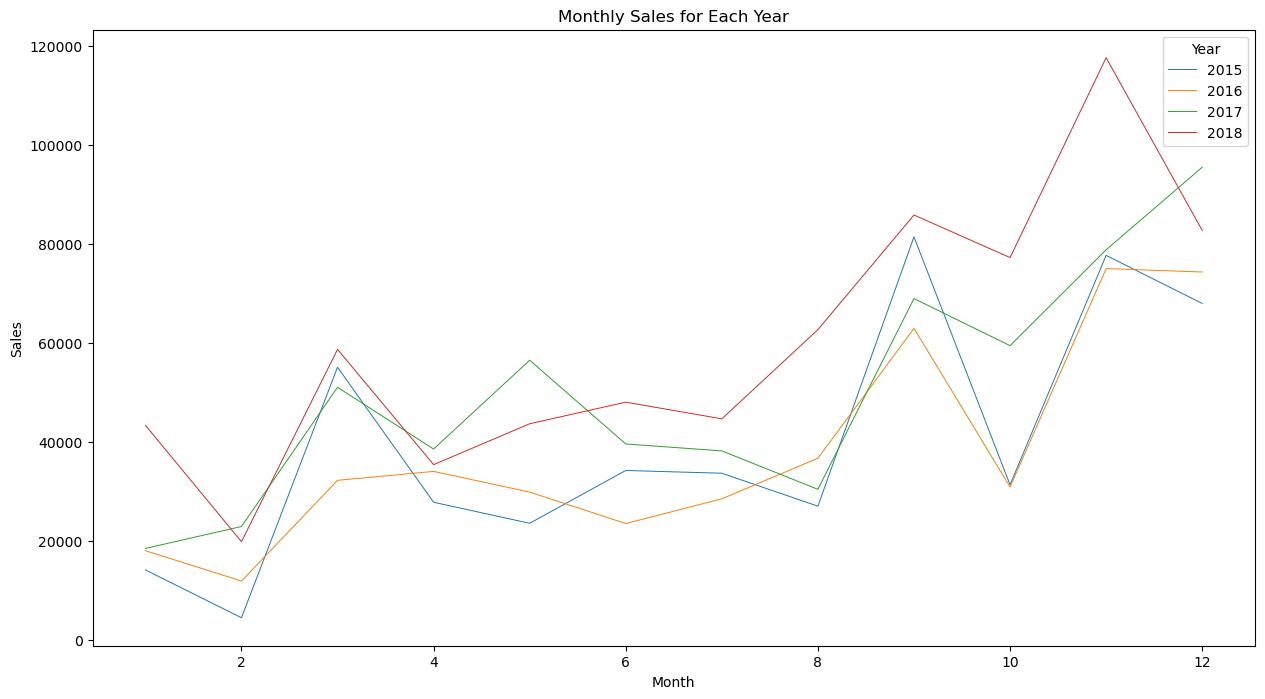

In [49]:
# Aggregate sales on a monthly basis for each year
monthly_sales_year = data.resample('M', on='Order_Date')['Sales'].sum().reset_index()
monthly_sales_year['year'] = monthly_sales_year['Order_Date'].dt.year

#Plotting
plt.figure(figsize=(15, 8))
for year in sorted(monthly_sales_year['year'].unique()):
    year_data = monthly_sales_year[monthly_sales_year['year'] == year]
    sns.lineplot(x=year_data['Order_Date'].dt.month, y=year_data['Sales'], label=year, linewidth=0.7)
plt.title('Monthly Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

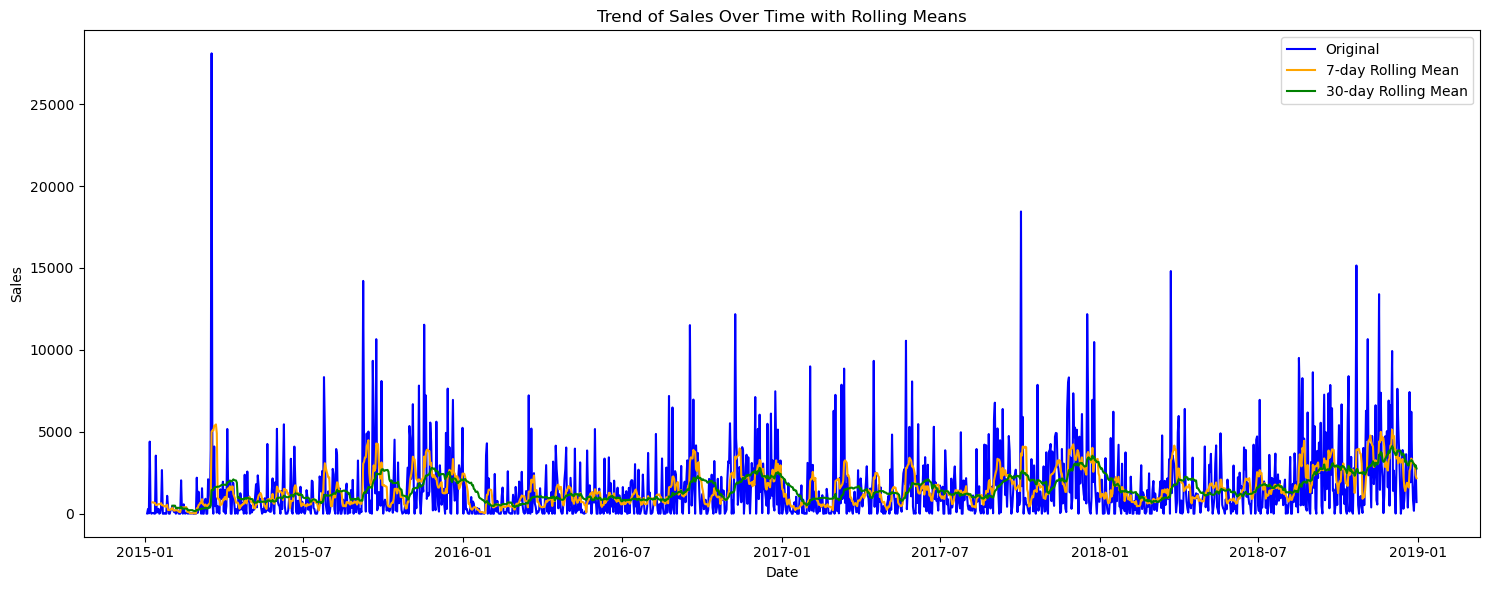

In [50]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

daily_sales = data.resample('D', on='Order_Date')['Sales'].sum()
rolling_7d = daily_sales.rolling(window=7).mean()
rolling_30d = daily_sales.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label='Original', color='blue')
sns.lineplot(x=rolling_7d.index, y=rolling_7d.values, label='7-day Rolling Mean', color='orange')
sns.lineplot(x=rolling_30d.index, y=rolling_30d.values, label='30-day Rolling Mean', color='green')
plt.title('Trend of Sales Over Time with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

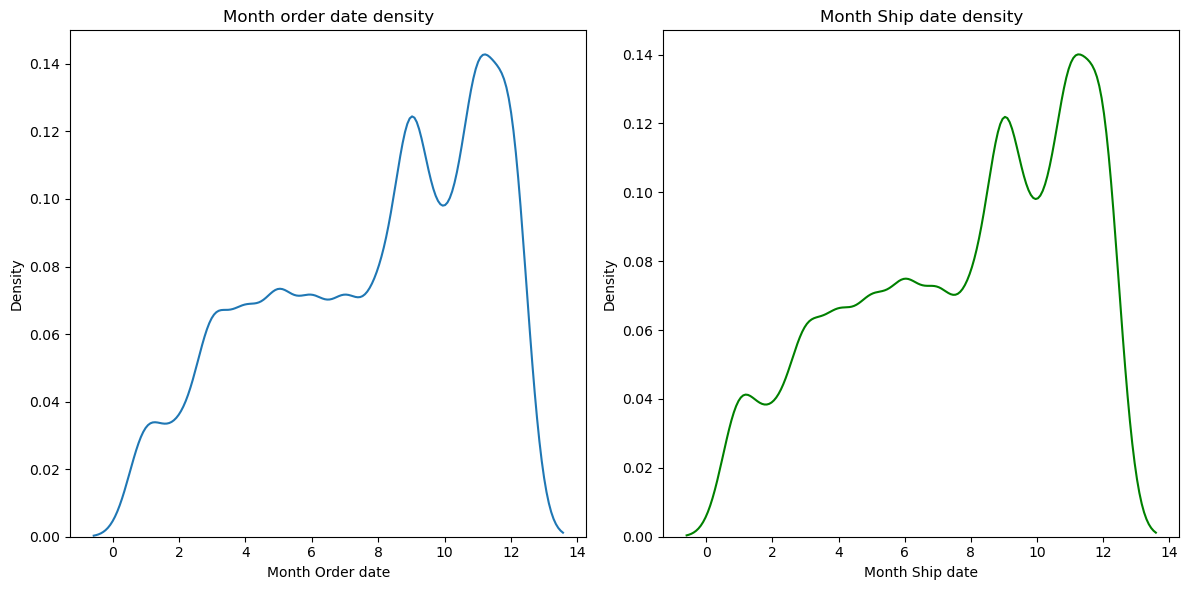

In [52]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="month_order_date")
plt.title("Month order date density")
plt.xlabel("Month Order date")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="month_ship_date", color = 'green')
plt.title("Month Ship date density")
plt.xlabel("Month Ship date")


plt.tight_layout()
plt.show()

Product Analysis

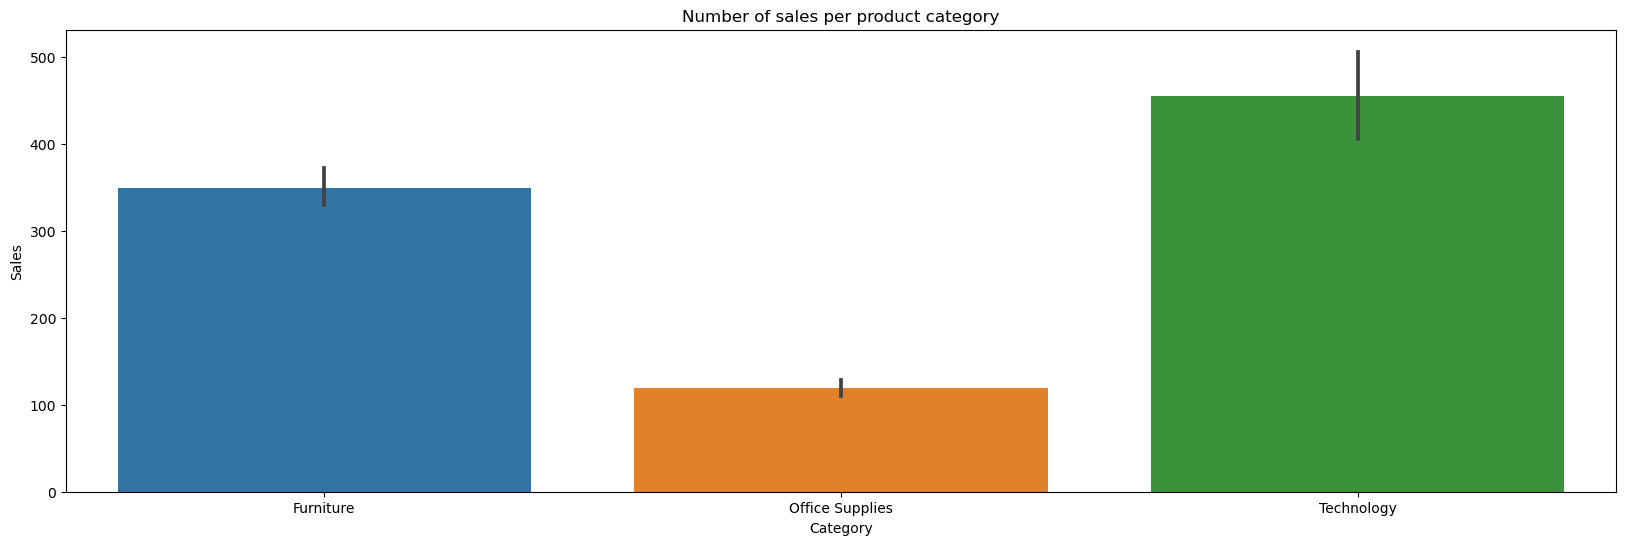

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(data=df , x='Category', y = 'Sales')
plt.title("Number of sales per product category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

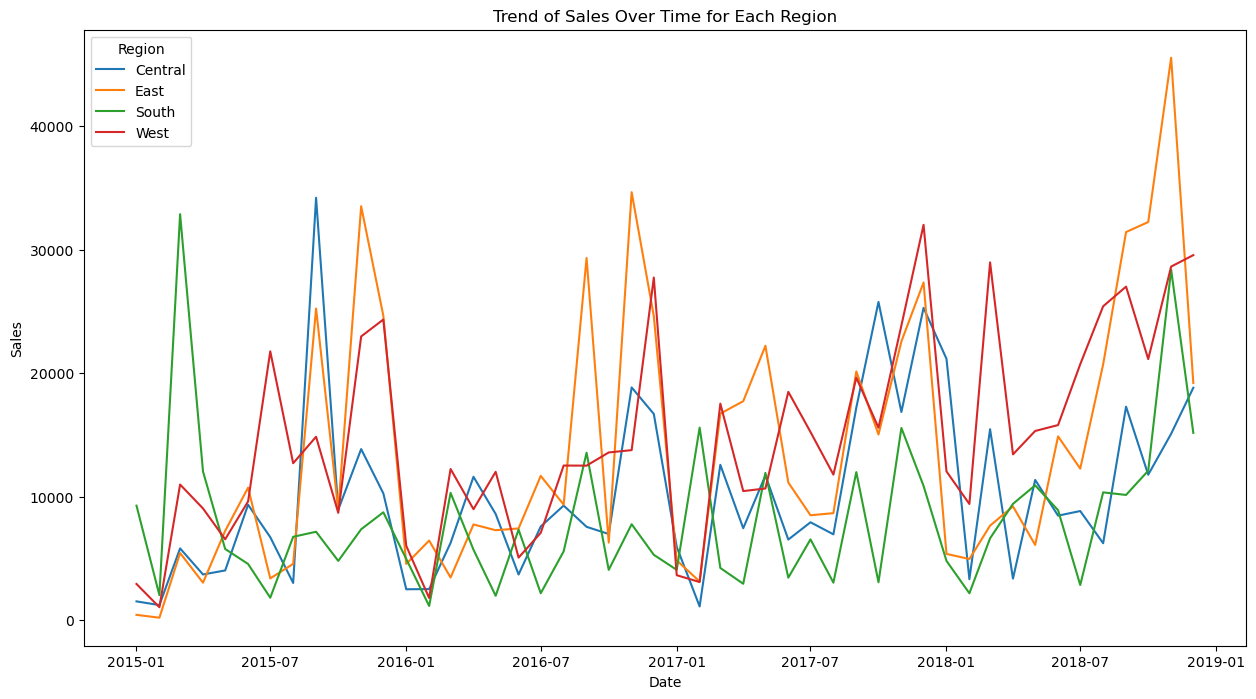

In [61]:
# Aggregate sales on a monthly basis for each region
monthly_sales_region = df.groupby([df['Order_Date'].dt.to_period('M'), 'Region'])['Sales'].sum().reset_index()
monthly_sales_region['Order_Date'] = monthly_sales_region['Order_Date'].dt.to_timestamp()

# Create a line plot for each region
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_sales_region, x='Order_Date', y='Sales', hue='Region')
plt.title('Trend of Sales Over Time for Each Region')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

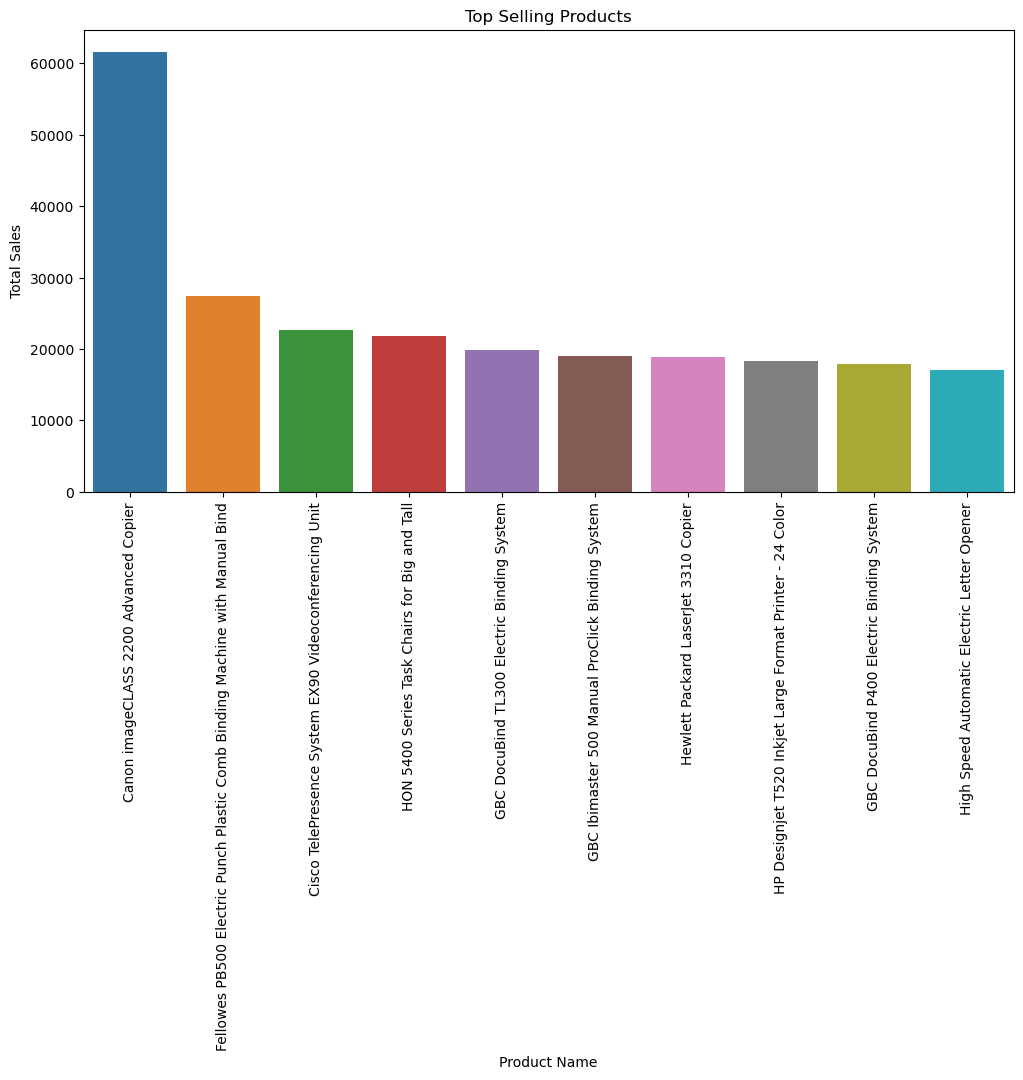

In [62]:
most_sold_products = df.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_products.index, y=most_sold_products.values)
plt.xticks(rotation=90)
plt.title("Top Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

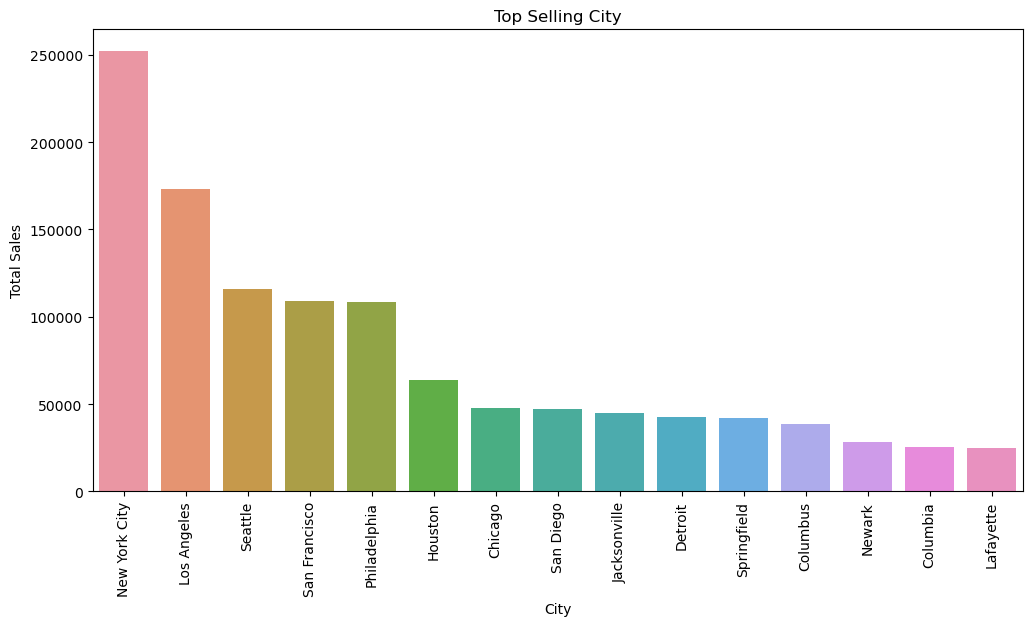

In [63]:
most_sold_City = df.groupby('City')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_City.index, y=most_sold_City.values)
plt.xticks(rotation=90)
plt.title("Top Selling City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

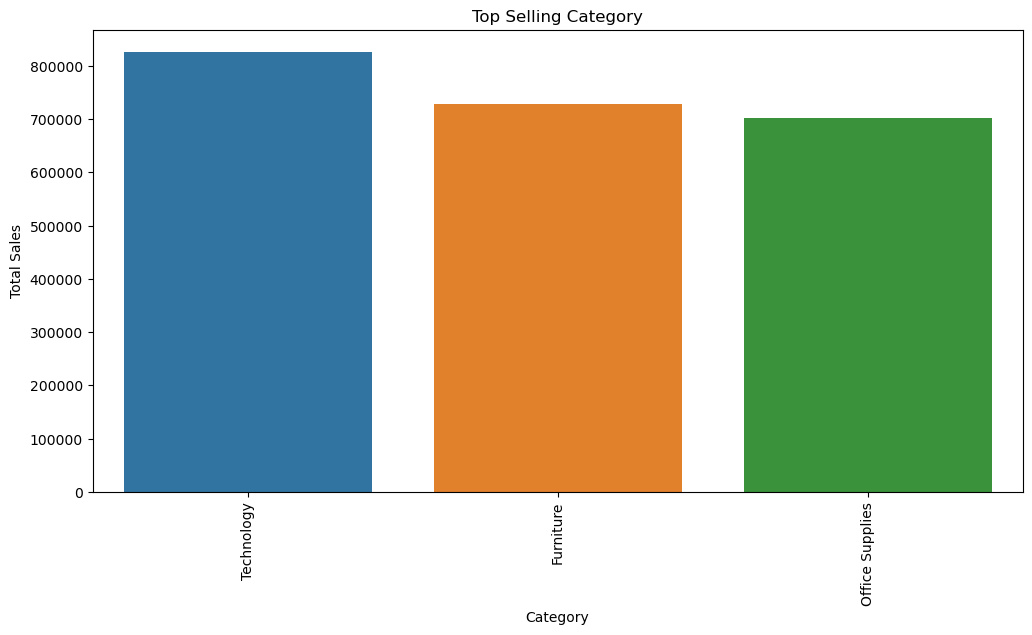

In [64]:
most_sold_Category = df.groupby('Category')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Category.index, y=most_sold_Category.values)
plt.xticks(rotation=90)
plt.title("Top Selling Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

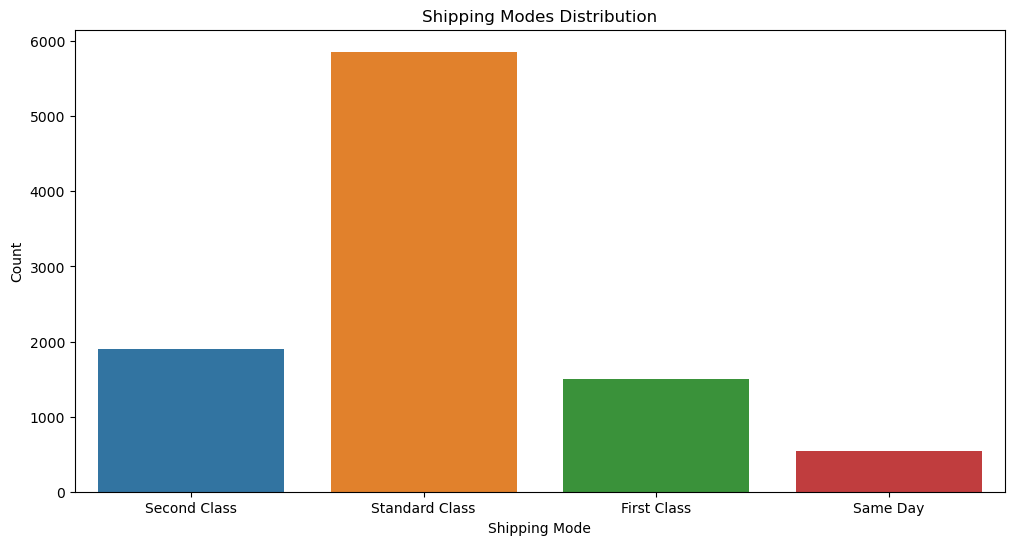

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Ship_Mode',data =df)
plt.title("Shipping Modes Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

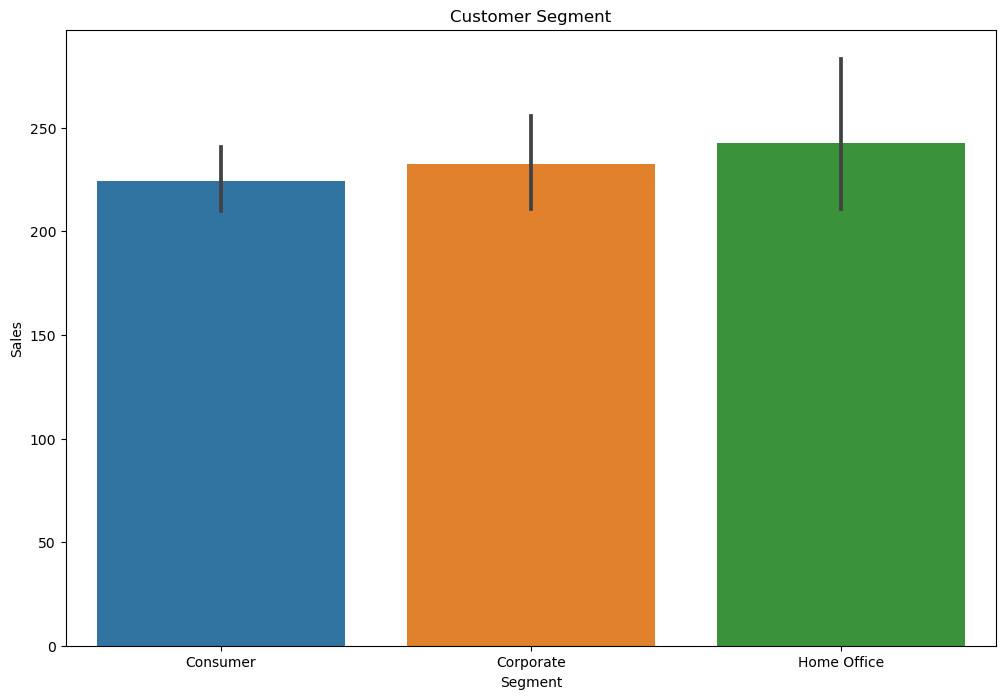

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', data=df)
plt.title("Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

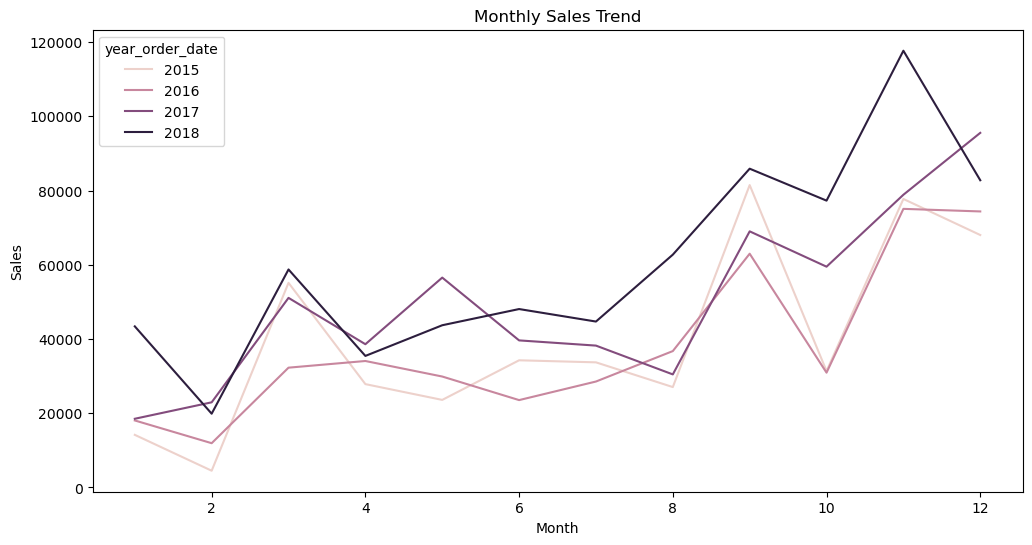

In [70]:
monthly_trend = df.groupby(['year_order_date', 'month_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_order_date', y='Sales', hue='year_order_date', data=monthly_trend)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()